# Safest Neighborhoods in Vancouver, BC
###### Coursera Applied Data Science Capstone Project - The Battle of Neighborhoods
 




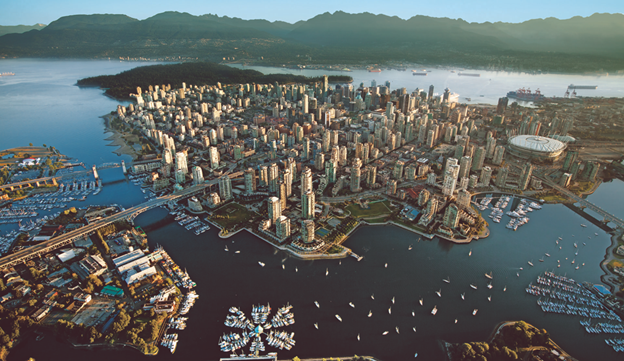







# Business Problem section

### Introduction

Vancouver is a coastal seaport city in western Canada, located in the Lower Mainland region of British Columbia. As the most populous city in the province, the 2016 census recorded 631,486 people in the city, up from 603,502 in 2011. The Greater Vancouver area had a population of 2,463,431 in 2016, making it the third-largest metropolitan area in Canada. Vancouver has the highest population density in Canada, with over 5,400 people per square kilometre, which makes it the fifth-most densely populated city with over 250,000 residents in North America, behind New York City, Guadalajara, San Francisco, and Mexico City. Vancouver is one of the most ethnically and linguistically diverse cities in Canada: 52% of its residents are not native English speakers, 48.9% are native speakers of neither English nor French, and 50.6% of residents belong to visible minority groups. 
Vancouver is consistently named as one of the top five worldwide cities for livability and quality of life, and the Economist Intelligence Unit acknowledged it as the first city ranked among the top ten of the world's most well-living cities for ten consecutive years. In 2011, the city planned to become the greenest city in the world by 2020. Vancouverism is the city's urban planning design philosophy.

### Background

Safety is the top concern when moving to a new area. If you don’t feel safe in your own home, you you’re not going to be able to enjoy living there.

### Business Problem
This project aims to select the safest borough in Vancouver, BC Canada based on the total crime, explore the neighborhoods of that borough to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using K-Mean clustering.

#### Key Questions

A.	What is the most common crime in Vancouver?
B.	Which of the boroughs have the highest crime rates?
C.	Which of the boroughs have the lowest crime rates?
D.	Identify the top 10 venues in each neighborhood
	
#### Interest and stakeholders
Expats who are considering to relocate to Vancouver and Real States companies will be interested to identify the safest borough in Vancouver and explore its neighborhoods and common venues around each neighborhood.

# Data section

The data acquisition for this project is a combination of data from two sources:

•	The first data source of the project uses Vancouver crime data. This dataset contains the Vancouver Police Department's crime records from 2013 to 2019. It can be found at: https://vancouver.ca/police/organization/planning-research-audit/stats-crime-rate.html
•	Foursquare API as its prime data gathering source as it has a database of more than 105 million places, especially their places API which provides the ability to perform location search, location sharing and details about a business. Photos, tips and reviews jolted by Foursquare users can also be used in many productive ways to add value to the results. 

### Work Flow

HTTP requests would be made to this Foursquare API server using postal codes of the Vancouver city neighborhoods to pull the location information (Latitude and Longitude).
Foursquare API search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 700.
Folium- Python visualization library would be used to visualize the neighborhoods cluster distribution of Vancouver city over an interactive leaflet map.
Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.
Unsupervised machine learning algorithm K-mean clustering would be applied to form the clusters of different categories of places residing in and around the neighborhoods. These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.


### 1. Python packages and Dependencies:
• Pandas - Library for Data Analysis • NumPy – Library to handle data in a vectorized manner • JSON – Library to handle JSON files • Geopy – To retrieve Location Data • Requests – Library to handle http requests • Matplotlib – Python Plotting Module • Sklearn – Python machine learning Library • Folium – Map rendering Library

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!pip install seaborn
import seaborn as sns
!pip install scipy

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
!pip install squarify

# import k-means from clustering stage
from sklearn.cluster import KMeans
#libraries for Data preprocess

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

#libraries for plotting
!pip install plotly==4.5.2
!pip install psutil requests
!pip install plotly-geo==1.0.0
!pip install chart-studio==1.0.0
import plotly.graph_objects as go

import xml

!pip install folium # map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

import time
import random # library for random number generation

print('Libraries imported.')

### 2. Load Data into a DataFrame

Hidden Cell personal data. I used IBM boto3 to load data.
Code used:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
Personel credentials
#add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
#If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
crime_records = pd.read_csv(body)
crime_records.head()

In [ ]:
# The code was removed by Watson Studio for sharing.

### 3. Initial data exploration and summary 

#### 3.0 Missing data detection

In [ ]:
# Reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")
missing_value_describe(crime_records)

From the above missing data examination, we have 4 columns with missing data: they are NEIGHHOURHOOD (10.42% missing), MINUTE(10.02% missing), HOUR(10.02% missing), and HUNDRED_BLOCK(0.002% missing).

The missing percentage of MINUTE and HOUR columns are the same we are going to disregar the missing information. However, the HUNDRED_BLOCk, which is the physical address, has ~10% lower missing value than the NEIGHBOURHOOD column. The missing data is due to Statistics Canada definition of neighbourhoods within municipalities. Neighbourhoods within the City of Vancouver are based on the census tract (CT) concept within census metropolitan area (CMA). The missing NEIGHBOURHOOD columns might be caused by unlabeled neighbourhoods in the Statistics Canada dataset or they just aren't labeled.
I am thinking about create a dictionary for each street-neighbourhood pair to predict the missing neighbourhood.

#### 3.1 Dimension of dataset 

In [ ]:
print("the dimension:", crime_records.shape)

We have over 600K rows and 10 columns in our dataset.

### 4. Distribution of each type of crime:

In [ ]:
crime_records['TYPE'].value_counts()

In [ ]:
# crime type distribution
nameplot = crime_records['TYPE'].value_counts().plot.bar(title='Count of each type of crime happened in Vancouver', figsize=(8,6))
nameplot.set_xlabel('category',size=20)
nameplot.set_ylabel('crime count',size=20)

In [ ]:
fig = go.Figure(data=go.Scatterpolar(
  r=crime_records['TYPE'].value_counts(),
  theta=crime_records['TYPE'].value_counts().index,
  fill='toself'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True
     ),
    ),
    showlegend=False,
    title_text="Vancouver Crime Record Radar Chart by Crime Type",
    autosize=True
)

fig.show()

It appears that the most common type of crime is associated with vehicle in Vancouver: Theft from Vehicle, Theft of Bicycle and Vehicle Collision. Since 2003, there are 209609 crime categorized as "Theft from Vehicle".

### 5. Has the crime decreased over the years in Vancouver?

In [ ]:
"""
Create empty dataframe to store the crime count over the years in Vancouver
"""
# year values
year_labels = sorted(crime_records["YEAR"].unique())

# crime types
crime_types = sorted(crime_records["TYPE"].unique().tolist())

# Create the pandas DataFrame 
crime_count_by_year = pd.DataFrame(columns =["year"]) 
crime_count_by_year["year"] = year_labels
crime_count_by_year

In [ ]:
# gather yearly count of crime in Vancouver
for current_type in crime_types:
    current_crime = crime_records[crime_records["TYPE"]==current_type]
    current_crime_counts = current_crime["YEAR"].value_counts(sort=False)
    current_crime_index = current_crime_counts.index.tolist()
    current_crime_index, current_crime_counts = zip(*sorted(zip(current_crime_index, current_crime_counts)))
    crime_count_by_year[current_type] = current_crime_counts
crime_count_by_year

Let's visualize the change of crime over the years across all the types of crime:

In [ ]:
# Create traces
fig = go.Figure()
for current_crime in crime_types:
    current_type_count = crime_count_by_year[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        )
    )
# Edit the layout
fig.update_layout(title='Crimes Over the Years in Vancouver by Type',
                    xaxis_title='Year',
                    yaxis_title='Absolute Change',
                    autosize=True,
                    height=570
                 )

fig.update_layout(legend_orientation="h")

fig.show()

In [ ]:
# Create traces
fig = go.Figure()
for current_crime in crime_types:
    current_type_count = crime_count_by_year[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        )
    )
# Edit the layout
fig.update_layout(title='Crimes Over the Years in Vancouver by Type',
                    xaxis_title='Year',
                    yaxis_title='Absolute Change',
                    autosize=True,
                    height=570
                 )

fig.update_layout(legend_orientation="h")

fig.show()

Percent Change of Crimes Over the Years

In [ ]:
# calculate percent change of crime for each type of crime
crime_count_by_year_percent_change = crime_count_by_year[crime_count_by_year.columns[1:]].pct_change() * 100
crime_count_by_year_percent_change["year"] = year_labels
crime_count_by_year_percent_change

In [ ]:
# Create traces
fig = go.Figure()
for current_crime in crime_types:
    current_type_count = crime_count_by_year_percent_change[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        )
    )

    # Edit the layout
fig.update_layout(title='Percent Change of Crimes Over the Years in Vancouver by Type',
                    xaxis_title='Year',
                    yaxis_title='Percent Change (%)',
                    autosize=True,
                    height=570
                 )
fig.update_layout(legend_orientation="h")    
fig.show()   

Using the percentage equals 0 as your reference, you will observe that the crimes of "Vehicle Collision or Pedestrain Struck (with Fatality)", "Theft of Bicyle", and "Homicide" has realtive more positive percentage changes through the years

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=2,
    subplot_titles=[str(i+1) + ". " + crime_types[i] for i in range(len(crime_types))]
)

# function to update row and col for adding subplots
current_row = 1
current_col = 1
def update_row_col(current_row, current_col):
    if current_col < 2:
        current_col += 1
    else:
        current_col = 1
        current_row += 1
    return current_row, current_col

# add trace to the subplot
current_count = 1
for current_crime in crime_types:
    current_type_count = crime_count_by_year[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        ),
        row=current_row, col=current_col
    )
    current_row, current_col = update_row_col(current_row, current_col)

fig.update_layout(
    height=1500, 
    width=900,
    title_text="Crimes in Vancouver Over the Years"
)

fig.update_layout(legend_orientation="h")
fig.show()

### 6. Crime records by month

### 6.1 What months have the most of the crimes recorded?

In [ ]:
nameplot = crime_records["MONTH"].value_counts().plot.bar(title='Count of crime happened in each month from 2003 to 2019', figsize=(8,6))
nameplot.set_xlabel('month',size=20)
nameplot.set_ylabel('crime count',size=20)

It appears that the months of summer time has more crime recorded than other months.

In [ ]:
nameplot = crime_records[crime_records["YEAR"] == 2019]["MONTH"].value_counts().plot.bar(title='Count of crime happened in each month of 2019', figsize=(8,6))
nameplot.set_xlabel('month',size=20)
nameplot.set_ylabel('crime count',size=20)

### 6.2 What are the count of each type of crime happened in each month in 2018?

In [ ]:
# get record by month
def get_record_by_month(month_num):
    return crime_records[(crime_records["YEAR"] == 2018) & (crime_records["MONTH"] == month_num)]

# get data in this month
month_dict = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
for month in sorted(crime_records["MONTH"].unique()):
    y = get_record_by_month(month)["TYPE"].value_counts()
    x = y.index.tolist()
    x, y = zip(*sorted(zip(x, y)))
    fig = go.Figure([go.Bar(x=x, y=y, text=y, textposition = 'outside')])
    fig.update(layout_title_text="Count of each type of crime happened in " + month_dict[month])
    fig.update_layout(
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Crime Count")),
        autosize=True,
        width=880,
        height=700,
    )
#     fig.update_xaxes(tickangle=-90)
    fig.show()
    

Overall, "Theft from Vehicle" remains to be the main type of crime happened in Vancouver in 2018 through the months. The 2nd and the 3rd most common crimes are "Mischief" and "Offence Against a Person" in 2018.

### 7. Crime investigation based on location data

We have 4 columns describe the locations of the given crime records. They are: HUNDRED_BLOCK, NEIGHBOURHOOD, X, and Y. Let's explore these columns now.

### 7.1 How many unique blocks do we have?

In [ ]:
len(crime_records["HUNDRED_BLOCK"].unique())

That's a lot of missing blocks. Let explore it.

In [ ]:
crime_records["HUNDRED_BLOCK"].value_counts()[:10].plot.bar(
    title='Top 10 Dangerous Blocks in Vancouver')
nameplot.set_xlabel('block name',size=20)
nameplot.set_ylabel('count',size=20)

To protect privacy, police labeled about 10% of the data to be "OFFSET TO PROTECT PRIVACY". Let's graph the top 10 crime-populated block without the "OFFSET TO PROTECT PRIVACY" rows

In [ ]:
crime_records["HUNDRED_BLOCK"].value_counts()[1:11].plot.bar(
    title='Top 10 Dangerous Blocks in Vancouver')
nameplot.set_xlabel('block name',size=20)
nameplot.set_ylabel('count',size=20)

Granville street seems to be very dangerous from the above visualization.
Well, 60K of 609K rows of data are offsetted to protect privacy. We won't be able to use those data because the HUNDRED_BLOCK, NEIGHBOURHOOD data, X, and Y data will be inaccurate to describe the crime happened in Vancouver from 2003 to 2019. Let's create a new dataframe with usable data that's not labeled as "OFFSET TO PROTECT PRIVACY"

In [ ]:
crime_records_without_offset = crime_records[crime_records["HUNDRED_BLOCK"] != "OFFSET TO PROTECT PRIVACY"]
crime_records_without_offset.shape

In [ ]:
crime_records_without_offset.head()

### 7.2 Classification model to predict the missing NEIGHBOURHOOD column's data.


We are not interested in block number anymore. Let's remove the number by stripping the first block before the first white space in the HUNDRED_BLOCK data

In [ ]:
# drop missing row in crime record where only 0.002% of HUNDRED_BLOCK row are missing
crime_records_without_offset = crime_records_without_offset[pd.notnull(crime_records_without_offset["HUNDRED_BLOCK"])]

In [ ]:
block_names = crime_records_without_offset["HUNDRED_BLOCK"]
block_names.isnull().sum() # make sure we don't have missing row for HUNDRED_BLOCK now

If the street number's first character is a number and the street's name has more than 2 word, I remove the street number from it.
Reason:
1. The street name's beginning can a letter which is not a street number. I don't want the location information lost through this preprocessing process.
2. The street name can be 2 words only such as Hasting Street. I don't want the first word to be lost and let the dataset only contains the "street" part.

In [ ]:
def remove_street_number(street_name):
    # if the beginning is a digit and the street name contains more than 2 words
    if street_name[0].isdigit() and len(street_name.split(" ")) > 2:
        _, _, tail = street_name.partition(" ")
        return tail
    return street_name

# apply the above function to remove the street number in each row
crime_records_without_offset["HUNDRED_BLOCK"] = block_names.apply(remove_street_number)

In [ ]:
crime_records_without_offset["HUNDRED_BLOCK"].head()

We have successfully removed the block number. Now, let's associate the block name to the neighbourhood data to create a dictionary to check whether the missing neighbourhood data's street has association with existing block already.

In [ ]:
street_with_missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
street_with_missing_neighbourhood

What is "NK_LOC ST"?
The Vancouver city website states it is default location value used for incidents with unknown location. Let's drop them for our spatial anaylsis.

In [ ]:
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="X NK_LOC ST"]
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!='X NK_LOC ST "SQUAMISH"']
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!='X NK_LOC ST "UBC"']

In [ ]:
street_with_missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
street_with_missing_neighbourhood

Create a dictionary of block-neighbourhood pair

In [ ]:
street_neighbour_dict = {}

# iterate over rows with iterrows()
for index, row in crime_records_without_offset.iterrows():
    # access data using column names
    if pd.isnull(row["NEIGHBOURHOOD"]) == False:
        street_neighbour_dict[row["HUNDRED_BLOCK"]] = row["NEIGHBOURHOOD"]

In [ ]:
# checking if the missing neighbourhood value for existing street is included
# in the dictionary I created above
existed_street_block_association = []
count = 0
for name in street_with_missing_neighbourhood.index.tolist():
    existed = False
    if name in street_neighbour_dict:
        existed_street_block_association.append(name)
        existed = True
        count += 1
print(count, "names are are existed in the dictionary")

In [ ]:
existed_street_block_association

Let's assign the street-neighbourhood dictionary values to fill the missing values

In [ ]:
# fill missing neighbourhood value with dictionary created above
for name in existed_street_block_association:
    crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"] == name, "NEIGHBOURHOOD"] = street_neighbour_dict[name]

In [ ]:
# reusable function to check the missing neighbourhood value
def missing_neighbourhood_val_count():
    return crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
missing_neighbourhood_val_count()

We have 5 rows left. Let's look at online neighbourhood map and the dataset before I remove the street number to assign NEIGHBOURHOOD column value to them.

After reviewing openStreetMap, I found out that:
1. MARINE DR / TAMATH CRES is belong to the Dunbar-southlands neighbourhood, althought it's within the edge of UBC area.

In [ ]:
crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"]=="SW MARINE DR / TAMATH CRES","NEIGHBOURHOOD"] = "Dunbar-Southlands"
missing_neighbourhood_val_count()

2. Victoria Avenue is actually belong to a city called White Rock. From the Vancouver neighbourhood map, it's not included. Let's drop it from the dataset

In [ ]:
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="BLOCK VICTORIA AVE"]
missing_neighbourhood_val_count()

3. Granville St / 58th Avenue belongs to the Kerrisdale neighbourhood.

In [ ]:
crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"]=="GRANVILLE ST / 58TH AVE","NEIGHBOURHOOD"] = "Kerrisdale"
missing_neighbourhood_val_count()

S / L block intersection is actually 30 minutes drive away from Hastings Street. Let's not replace value for now since it's only 1 of 600K data row. I will assign neighbourhood value to it after I examine the longtitude and latitude data later

In [ ]:
crime_records_without_offset["NEIGHBOURHOOD"].unique()

### 8. Top 10 most dangerous neighbourhood in Vancouver

In [ ]:
crime_records["NEIGHBOURHOOD"].value_counts()[1:11].plot.bar(
    title='Top 10 Dangerous Neighbourhood in Vancouver', color="orange")
nameplot.set_xlabel('neighhourhood name',size=20)
nameplot.set_ylabel('count',size=20)

It turns out the most crime populated neighbourhood is West End.
Let's use a treemap to visualize crimes in West End

In [ ]:
# crimes in west end
west_end_crimes = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]
values = west_end_crimes["TYPE"].value_counts()
labels = values.index.tolist()
labels

In [ ]:
values

8 of 1328 collision resulted fatality. The "or" really makes the data unclear and they didn't state the total death count.
Let's combine the last two element of the list together and reduce the string length for better visualization.

In [ ]:
labels.pop()
labels[-1] = "Veh. Collis/ Ped Struck"
labels

In [ ]:
values[-2] += values[-1]
values = values[:len(values)-1]
values

In [ ]:
!pip install squarify
import squarify
import matplotlib.colors
import matplotlib.cm

norm = matplotlib.colors.Normalize(vmin=min(values), vmax=max(values))
colors = [matplotlib.cm.Blues(norm(value)) for value in values]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 12)
squarify.plot(sizes=values, label=labels, color = colors, alpha=0.7)
plt.title("Crimes in West End Neighbourhood",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

Let's take a look the x and y values of the crime happened in West End neighbourhood

In [ ]:
west_end_X = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X,west_end_Y, color="red", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End from 2003 to 2019') 
plt.show()

The scatter plot is actually the shape of the West End neighbourhood.
Crimes happened on almost every street of West End from 2003 to 2019.

In [ ]:
cimes_2003 = crime_records_without_offset[crime_records_without_offset["YEAR"]==2003]
west_end_X_2003 = cimes_2003[cimes_2003["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y_2003 = cimes_2003[cimes_2003["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X_2003,west_end_Y_2003, color="brown", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End in 2003') 
plt.show()

In [ ]:
cimes_2019 = crime_records_without_offset[crime_records_without_offset["YEAR"]==2019]
west_end_X_2019 = cimes_2019[cimes_2019["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y_2019 = cimes_2019[cimes_2019["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X_2019,west_end_Y_2019, color="orange", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End in 2019') 
plt.show()

Comparing the X, and Y of records from West End, the above plots show the crimes scattered through the neighbourhood and depicted almost the full street map of the West End neighbourhood.

### 9. Vancouver Crimes Heatmap with Folium

Function to convert UTM to Longtitude and Latitude system.

In [ ]:
import math

def utmToLatLong(utmEasting, utmNorthing, utmZone):
    eastingOffset = 500000.0
    northingOffset = 10000000.0
    k0 = 0.9996
    equatorialRadius = 6378137.0
    eccSquared = 0.006694380023
    eccPrimeSquared = eccSquared / (1 - eccSquared)
    e1 = (1 - math.sqrt(1 - eccSquared)) / (1 + math.sqrt(1 - eccSquared));
    rad2deg = 180.0/math.pi

    # Casts input from string to floats or ints
    # Removes 500,000 metre offset for longitude
    xUTM = float(utmEasting) - eastingOffset
    yUTM = float(utmNorthing)
    zoneNumber = int(utmZone)

    # Finds the origin longitude for the zone
    lonOrigin = (zoneNumber - 1) * 6 - 180 + 3 # +3 puts in zone centre

    M = yUTM / k0 #This finds the meridional arc
    mu = M / (equatorialRadius * (1- eccSquared / 4 - 3 * eccSquared * eccSquared / 64 -5 * eccSquared * eccSquared * eccSquared /256))

    # Calculates the footprint latitude
    phi1Rad = mu + (3 * e1 / 2 - 27 * e1 * e1 * e1 /32) * math.sin(2*mu) + ( 21 * e1 * e1 / 16 - 55 * e1 * e1 * e1 * e1 / 32) * math.sin( 4 * mu) + (151 * e1 * e1 * e1 / 96) * math.sin(6 * mu)
    phi1 = phi1Rad * rad2deg

    # Variables for conversion equations
    N1 = equatorialRadius / math.sqrt( 1 - eccSquared * math.sin(phi1Rad) *  math.sin(phi1Rad))
    T1 = math.tan(phi1Rad) * math.tan(phi1Rad)
    C1 = eccPrimeSquared * math.cos(phi1Rad) * math.cos(phi1Rad)
    R1 = equatorialRadius * (1 - eccSquared) / math.pow(1 - eccSquared * math.sin(phi1Rad) * math.sin(phi1Rad), 1.5)
    D = xUTM / (N1 * k0)

    # Calculate latitude, in decimal degrees
    lat = phi1Rad - ( N1 * math.tan(phi1Rad) / R1) * (D * D / 2 - (5 + 3 * T1 + 10 * C1 - 4 * C1 * C1 - 9 * eccPrimeSquared) * D * D * D * D / 24 + (61 + 90 * T1 + 298 * C1 + 45 * T1 * T1 - 252 * eccPrimeSquared - 3 * C1 * C1) * D * D * D * D * D * D / 720)
    lat = lat * rad2deg
    
    # Calculate longitude, in decimal degrees
    lon = (D - (1 + 2 * T1 + C1) * D * D * D / 6 + (5 - 2 * C1 + 28 * T1 - 3 * C1 * C1 + 8 * eccPrimeSquared + 24 * T1 * T1) * D * D * D * D * D / 120) / math.cos(phi1Rad)
    lon = lonOrigin + lon * rad2deg
    
    return lon, lat

In [ ]:
crime_records_without_offset = crime_records_without_offset.reset_index(drop=True)

In [ ]:
crimes_vancouver_X = crime_records_without_offset["X"]
crimes_vancouver_Y = crime_records_without_offset["Y"]
longtitude = []
latitude = []
for i in range(len(crimes_vancouver_X)):
    lon, lat = utmToLatLong(crimes_vancouver_X[i], crimes_vancouver_Y[i], 10)
    longtitude.append(lon)
    latitude.append(lat)

In [ ]:
crime_records_without_offset["LONGTITUDE"] = longtitude
crime_records_without_offset["LATITUDE"] = latitude
crime_records_without_offset.head()

We have the latitude and longtitude value now! let's find out where should the neighbourhood be for the record with "S / L 300 BLK E HASTINGS ST" HUNDRED_BLOCK value.

In [ ]:
missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]=="S / L 300 BLK E HASTINGS ST"]
missing_neighbourhood_Lon = missing_neighbourhood["LONGTITUDE"]
missing_neighbourhood_Lat = missing_neighbourhood["LATITUDE"]
lat_lon_pair = list(zip(missing_neighbourhood_Lat, missing_neighbourhood_Lon))
print("Latitude and Longtitude of the missing neighbourhood row")
lat_lon_pair

I will use folium for heatmap and clusterMarker data visualization

In [ ]:
!pip install folium
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [ ]:
print("Where is the missing neighbourhood row located?")
missing_neighbourhood_vis = folium.Map(location= [49.4985,-123.8159], 
                           tiles = "Stamen Terrain",
                           zoom_start = 9)
popups = ["Missing Neighbourhood Record"]
MarkerCluster(lat_lon_pair, popups=popups).add_to(missing_neighbourhood_vis)
missing_neighbourhood_vis

It turns out that's far away from the city of Vancouver. Let's consider it as an outlier and remove it from the dataset.

In [ ]:
# not include the row in our analysis
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="S / L 300 BLK E HASTINGS ST"]
crime_records_without_offset = crime_records_without_offset.reset_index(drop=True) # reset index
missing_neighbourhood_val_count() # checking missing neighbourhood value

In [ ]:
missing_value_describe(crime_records_without_offset)

In [ ]:
crime_records_without_offset = crime_records_without_offset.dropna()

In [ ]:
missing_value_describe(crime_records_without_offset)

We don't have row with missing neighbourhood value now!

In [ ]:
# return a list of latitude and longtitude data based on specified year
def get_record_locations_by_year(year):
    lat = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]["LATITUDE"]
    lon = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]["LONGTITUDE"]
    return list(zip(lat, lon))

Let's take a look at the crime heatmap of 2019 so far
Feel free to zoom in!

In [ ]:
latlon_2019 = get_record_locations_by_year(2019)
crime_heatmap = folium.Map(location= [49.24, -123.11], 
                           tiles = "Stamen Toner",
                           zoom_start = 12)
HeatMap(latlon_2019).add_to(crime_heatmap)
crime_heatmap

It's very crime populated. Let's zoom in to see to the crimes in West End (2019).

In [ ]:
# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_and_neighbourhood(year, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    lat = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["LATITUDE"]
    lon = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["LONGTITUDE"]
    return list(zip(lat, lon))

In [ ]:
latlon_west_end_2019 = get_record_locations_by_year_and_neighbourhood(2019, "West End")
crime_heatmap = folium.Map(location= [49.28416, -123.13150], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
HeatMap(latlon_west_end_2019).add_to(crime_heatmap)
crime_heatmap

In [ ]:
# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_and_type(year, crime_type):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    lat = crimes[crimes["TYPE"]==crime_type]["LATITUDE"]
    lon = crimes[crimes["TYPE"]==crime_type]["LONGTITUDE"]
    return list(zip(lat, lon))

# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_type_neighbourhood(year, crime_type, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    crimes = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]
    lat = crimes[crimes["TYPE"]==crime_type]["LATITUDE"]
    lon = crimes[crimes["TYPE"]==crime_type]["LONGTITUDE"]
    return list(zip(lat, lon))

Let's take look at the "Theft from Vehicle" crimes in West End (2019)

In [ ]:
print("West End 'Theft from Vehicle' Crimes Heatmap in 2019")
latlon_west_end_2019 = get_record_locations_by_year_type_neighbourhood(2019, "Theft from Vehicle", "West End")
west_end_TFC = folium.Map(location= [49.28416, -123.13150], 
                           tiles = "Stamen Terrain",
                           zoom_start = 15)
popups = ["Theft from Vehicle" for _ in range(len(latlon_west_end_2019))] # Popups texts are simple numbers.
MarkerCluster(latlon_west_end_2019, popups=popups).add_to(west_end_TFC)
west_end_TFC

Let's apply same type of graph to Stanley Park, which is popular sight.


In [ ]:
print("Crimes happened in Stanley Park in 2019 so far")
latlon_stanely_park_2019 = get_record_locations_by_year_and_neighbourhood(2019, "Stanley Park")
crime_heatmap = folium.Map(location= [49.30330, -123.14635], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
HeatMap(latlon_stanely_park_2019).add_to(crime_heatmap)
crime_heatmap

In [ ]:
def get_crime_types(year, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    crime_types = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["TYPE"]
    return crime_types

In [ ]:
print("Crimes happened in Stanley Park in 2019 so far")
latlon_stanely_park_2019 = get_record_locations_by_year_and_neighbourhood(2019, "Stanley Park")
crime_clusterMarkers = folium.Map(location= [49.30330, -123.14635], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
popups = [i for i in get_crime_types(2019, "Stanley Park")] # Popups texts are simple numbers.
MarkerCluster(latlon_stanely_park_2019, popups=popups).add_to(crime_clusterMarkers)
crime_clusterMarkers

From the clustered markers, you can see where are the commericial building and where are the popular bicylce

### 10. Vancouver crime data conclusion

Through this exploratory analysis of the Vancouver crime data:
1. I found that the most common crime in Vancouver is related to vehicle such "Theft of Vehicle", "Theft of Bicycle" and "Vehicle Collision". Definitely, watch out for your bikes, motocycle, and cars.
2. West End neighbourhood remain the most crime populated area from 2003 to 2019. The location record of crimes committed in West End can be used to draw a clear street map of West End.
3. The ocurrences of crimes are quite evenly distributed if crimes are counted by day or counted by month. However, crime occurs more in after work hours and midnight in Vancouver.

### 11. Exploring venues in the top 10 most dangerous neighbourhood in Vancouver using Foursquare API

### 11.0 Cluster

In [ ]:
crime_records_without_offset.head()

In [ ]:
# create map of Vancouver using latitude and longitude values
map_Vancouver = folium.Map(location=[49.30330, -123.14635], zoom_start=10)

# add markers to map
for lat, lng, HUNDRED_BLOCK, NEIGHBOURHOOD in zip(crime_records_without_offset['LATITUDE'], crime_records_without_offset['LONGTITUDE'], crime_records_without_offset['HUNDRED_BLOCK'], crime_records_without_offset['NEIGHBOURHOOD']):
    label = '{}, {}'.format(NEIGHBOURHOOD, HUNDRED_BLOCK)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver

In [ ]:
# The code was removed by Watson Studio for sharing.

In [ ]:
address = 'Vancouver, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print("Processing {}...".format(name))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
downtown_venues = getNearbyVenues(names=downtown_data['Neighbourhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )

In [ ]:
print(downtown_venues.shape)
downtown_venues.head()

In [ ]:
downtown_venues.groupby('Neighborhood').count()

In [ ]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

In [ ]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

In [ ]:
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

In [ ]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()